<a href="https://colab.research.google.com/github/MaxManfred/deep-learning/blob/master/notebooks/Movie_Review_Classification_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

from keras import preprocessing

from keras import Sequential

from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Flatten

from keras.optimizers import RMSprop

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# number of words to consider as features
max_features = 100_000

# max review length
max_review_length = 1_000

# the dimension of the embedding vector space
embedding_dimentionality = 16

In [0]:
# load IMDB data
(training_samples, training_labels), (test_samples, test_labels) = imdb.load_data(num_words = max_features)
# print(training_samples.shape)
# print(test_samples.shape)
# print(training_samples[0])

In [0]:
# turn lists of integers (the reviews are collections of word integers) into 2D tensorsof shape (num_samples, max_review_length)
training_samples = preprocessing.sequence.pad_sequences(training_samples, maxlen=max_review_length)
# print(training_samples.shape)
test_samples = preprocessing.sequence.pad_sequences(test_samples, maxlen=max_review_length)
# print(test_samples.shape)

In [0]:
# create neural network
neural_network = Sequential()
# create the embedding layers to traing: it will work on 
# max_features words in total 
# distributed in reviews of maximum length max_review_length 
# and will output a tensor of shape (num_samples, max_review_length, embedding_dimentionality)
# so taht each word will be represented by a vector of length embedding_dimentionality
neural_network.add(Embedding(max_features, embedding_dimentionality, input_length = max_review_length))
# this layer will flatten the 3D tensor of shape (num_samples, max_review_length, embedding_dimentionality)
# into a 2D tensor of shape (num_samples, max_review_length * embedding_dimentionality)
neural_network.add(Flatten())
# the add processing layers
neural_network.add(Dense(16, activation='relu'))
neural_network.add(Dense(16, activation='relu'))
neural_network.add(Dense(1, activation='sigmoid'))

In [0]:
# define optimization process
neural_network.compile(
    optimizer = RMSprop(lr = 0.001), 
    loss = 'binary_crossentropy', 
    metrics = ['accuracy']
)

In [7]:
# show neural network architecture
neural_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 16)          1600000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,856,305
Trainable params: 1,856,305
Non-trainable params: 0
_________________________________________________________________


In [12]:
training_history = neural_network.fit(training_samples, training_labels, epochs = 20, batch_size = 512, validation_split = 0.2)

neural_network.save_weights('movie_review_word_embeddings.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 1s 48us/step - loss: 3.4409e-06 - acc: 1.0000 - val_loss: 0.7483 - val_acc: 0.8740
Epoch 2/20
20000/20000 [==============================] - 1s 42us/step - loss: 4.5138e-06 - acc: 1.0000 - val_loss: 0.7704 - val_acc: 0.8728
Epoch 3/20
20000/20000 [==============================] - 1s 42us/step - loss: 9.2060e-07 - acc: 1.0000 - val_loss: 0.7948 - val_acc: 0.8704
Epoch 4/20
20000/20000 [==============================] - 1s 43us/step - loss: 2.5246e-04 - acc: 1.0000 - val_loss: 0.9080 - val_acc: 0.8680
Epoch 5/20
20000/20000 [==============================] - 1s 43us/step - loss: 1.7840e-06 - acc: 1.0000 - val_loss: 0.8443 - val_acc: 0.8740
Epoch 6/20
20000/20000 [==============================] - 1s 45us/step - loss: 5.8223e-07 - acc: 1.0000 - val_loss: 0.8309 - val_acc: 0.8738
Epoch 7/20
20000/20000 [==============================] - 1s 43us/step - loss: 3.4942e-07 - acc: 1.0000 -

History keys:  dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])




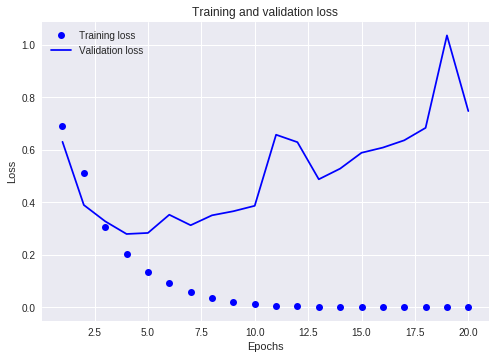

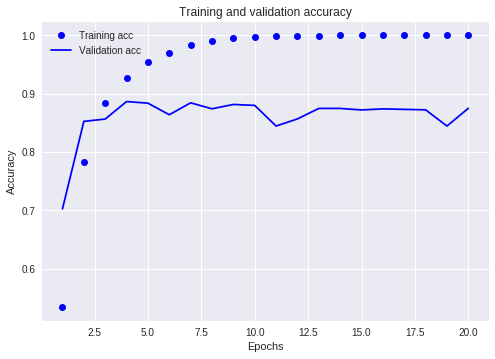

In [11]:
history_dict = training_history.history
print('History keys: ', history_dict.keys())
print('\n')

# display loss using matplot lib
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# clear diagram
plt.clf()
print('\n')

# display accuracy using matplotlib
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()